# Import Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

The aim of this script is to predict the price of a house based on its features

# Import House Pricess Data, Get General Info

In [2]:
data = pd.read_csv(r'AmesHousing.csv')
data = data.drop(['Order', 'PID'], axis=1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

# View Sample of the Data

In [4]:
data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Summary Statistica on Data Variables

In [5]:
data.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Distribution Plots for the Numeric Variables

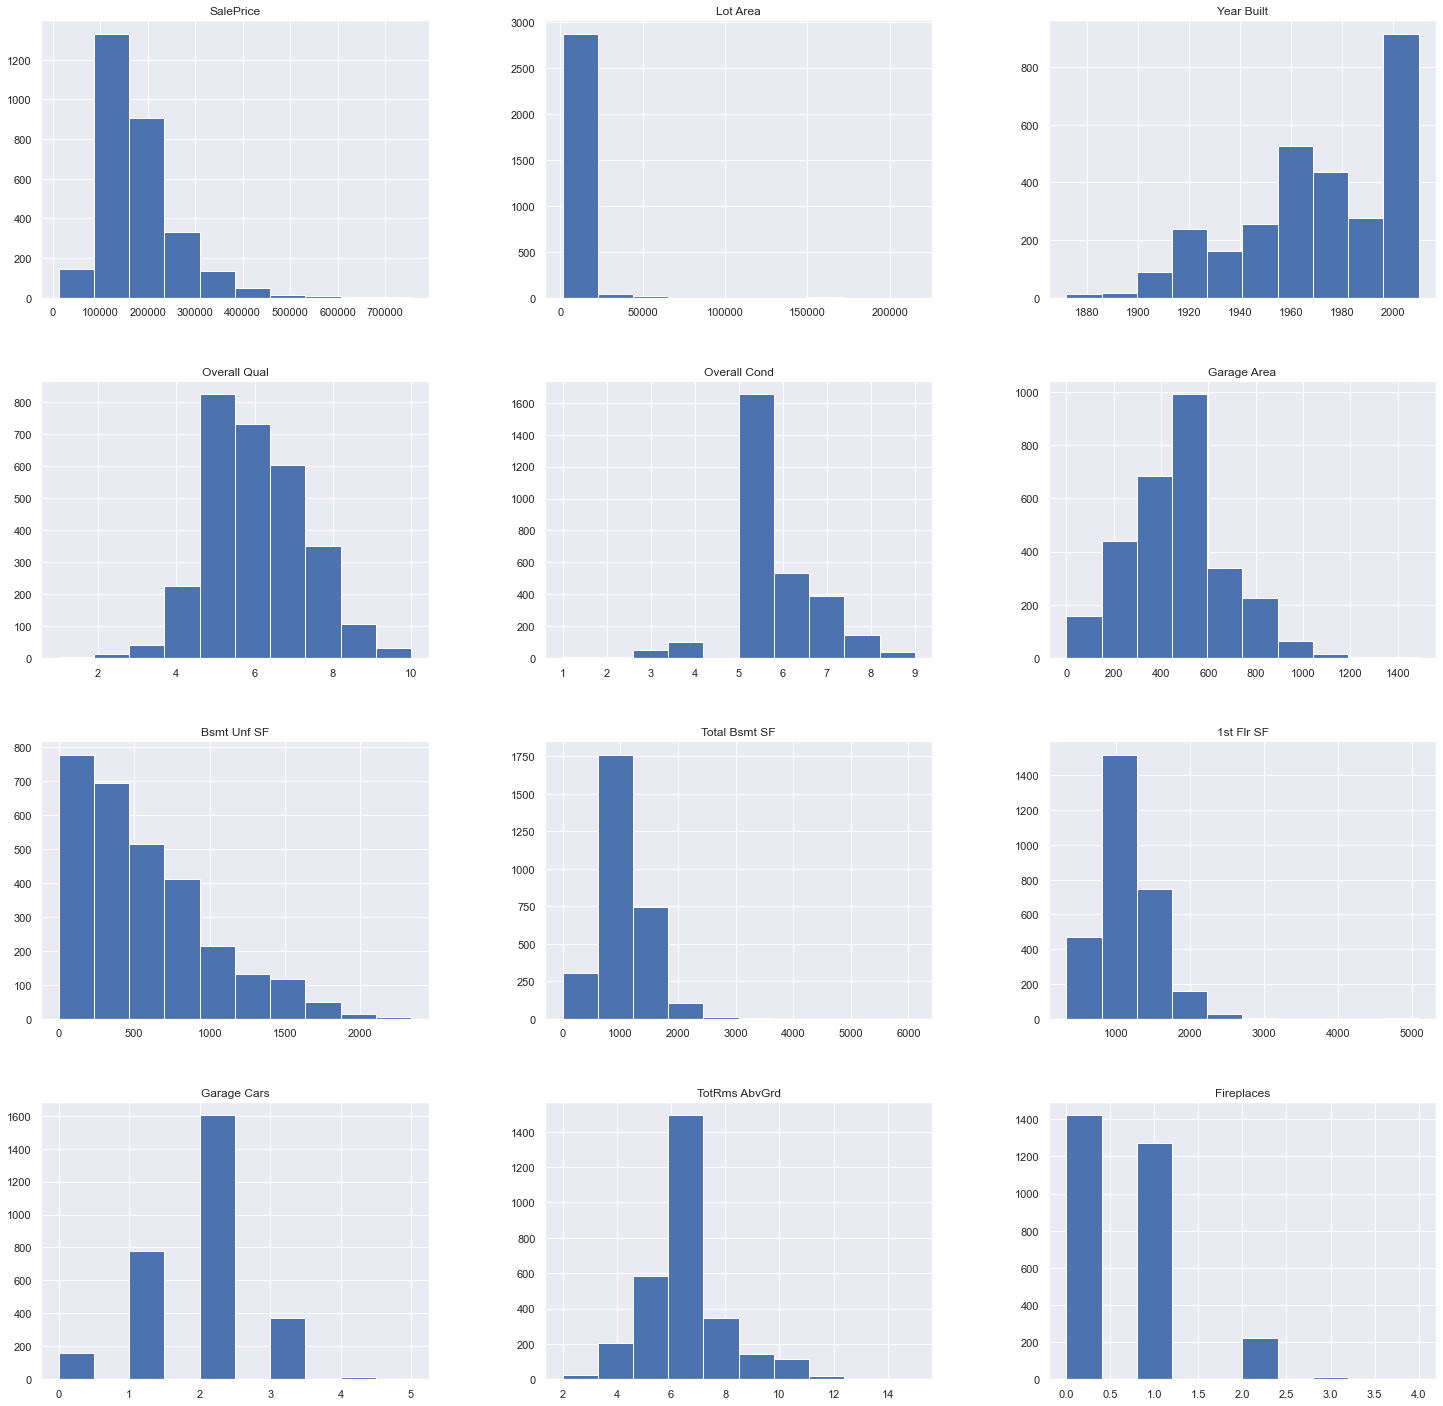

In [6]:
%matplotlib inline
data_distributions = data[['SalePrice','Lot Area','Year Built','Overall Qual','Overall Cond','Garage Area',
                          'Bsmt Unf SF','Total Bsmt SF','1st Flr SF','Garage Cars','TotRms AbvGrd','Fireplaces']]
data_distributions.hist(figsize=(25,25))
plt.show()

# Check for Missing Values

In [7]:
Checkmissing = data.isnull().sum().to_frame('Missing_Value_Count')
Checkmissing[Checkmissing['Missing_Value_Count']>0]

,Missing_Value_Count
Lot Frontage,490
Alley,2732
Mas Vnr Type,23
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81


# Correlations of the Independent Variables to the Dependent Variable

In [8]:
corr_matrix = data.corr()

In [9]:
corr_matrix['SalePrice'].sort_values(ascending=False).to_frame('Correlations')

,Correlations
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


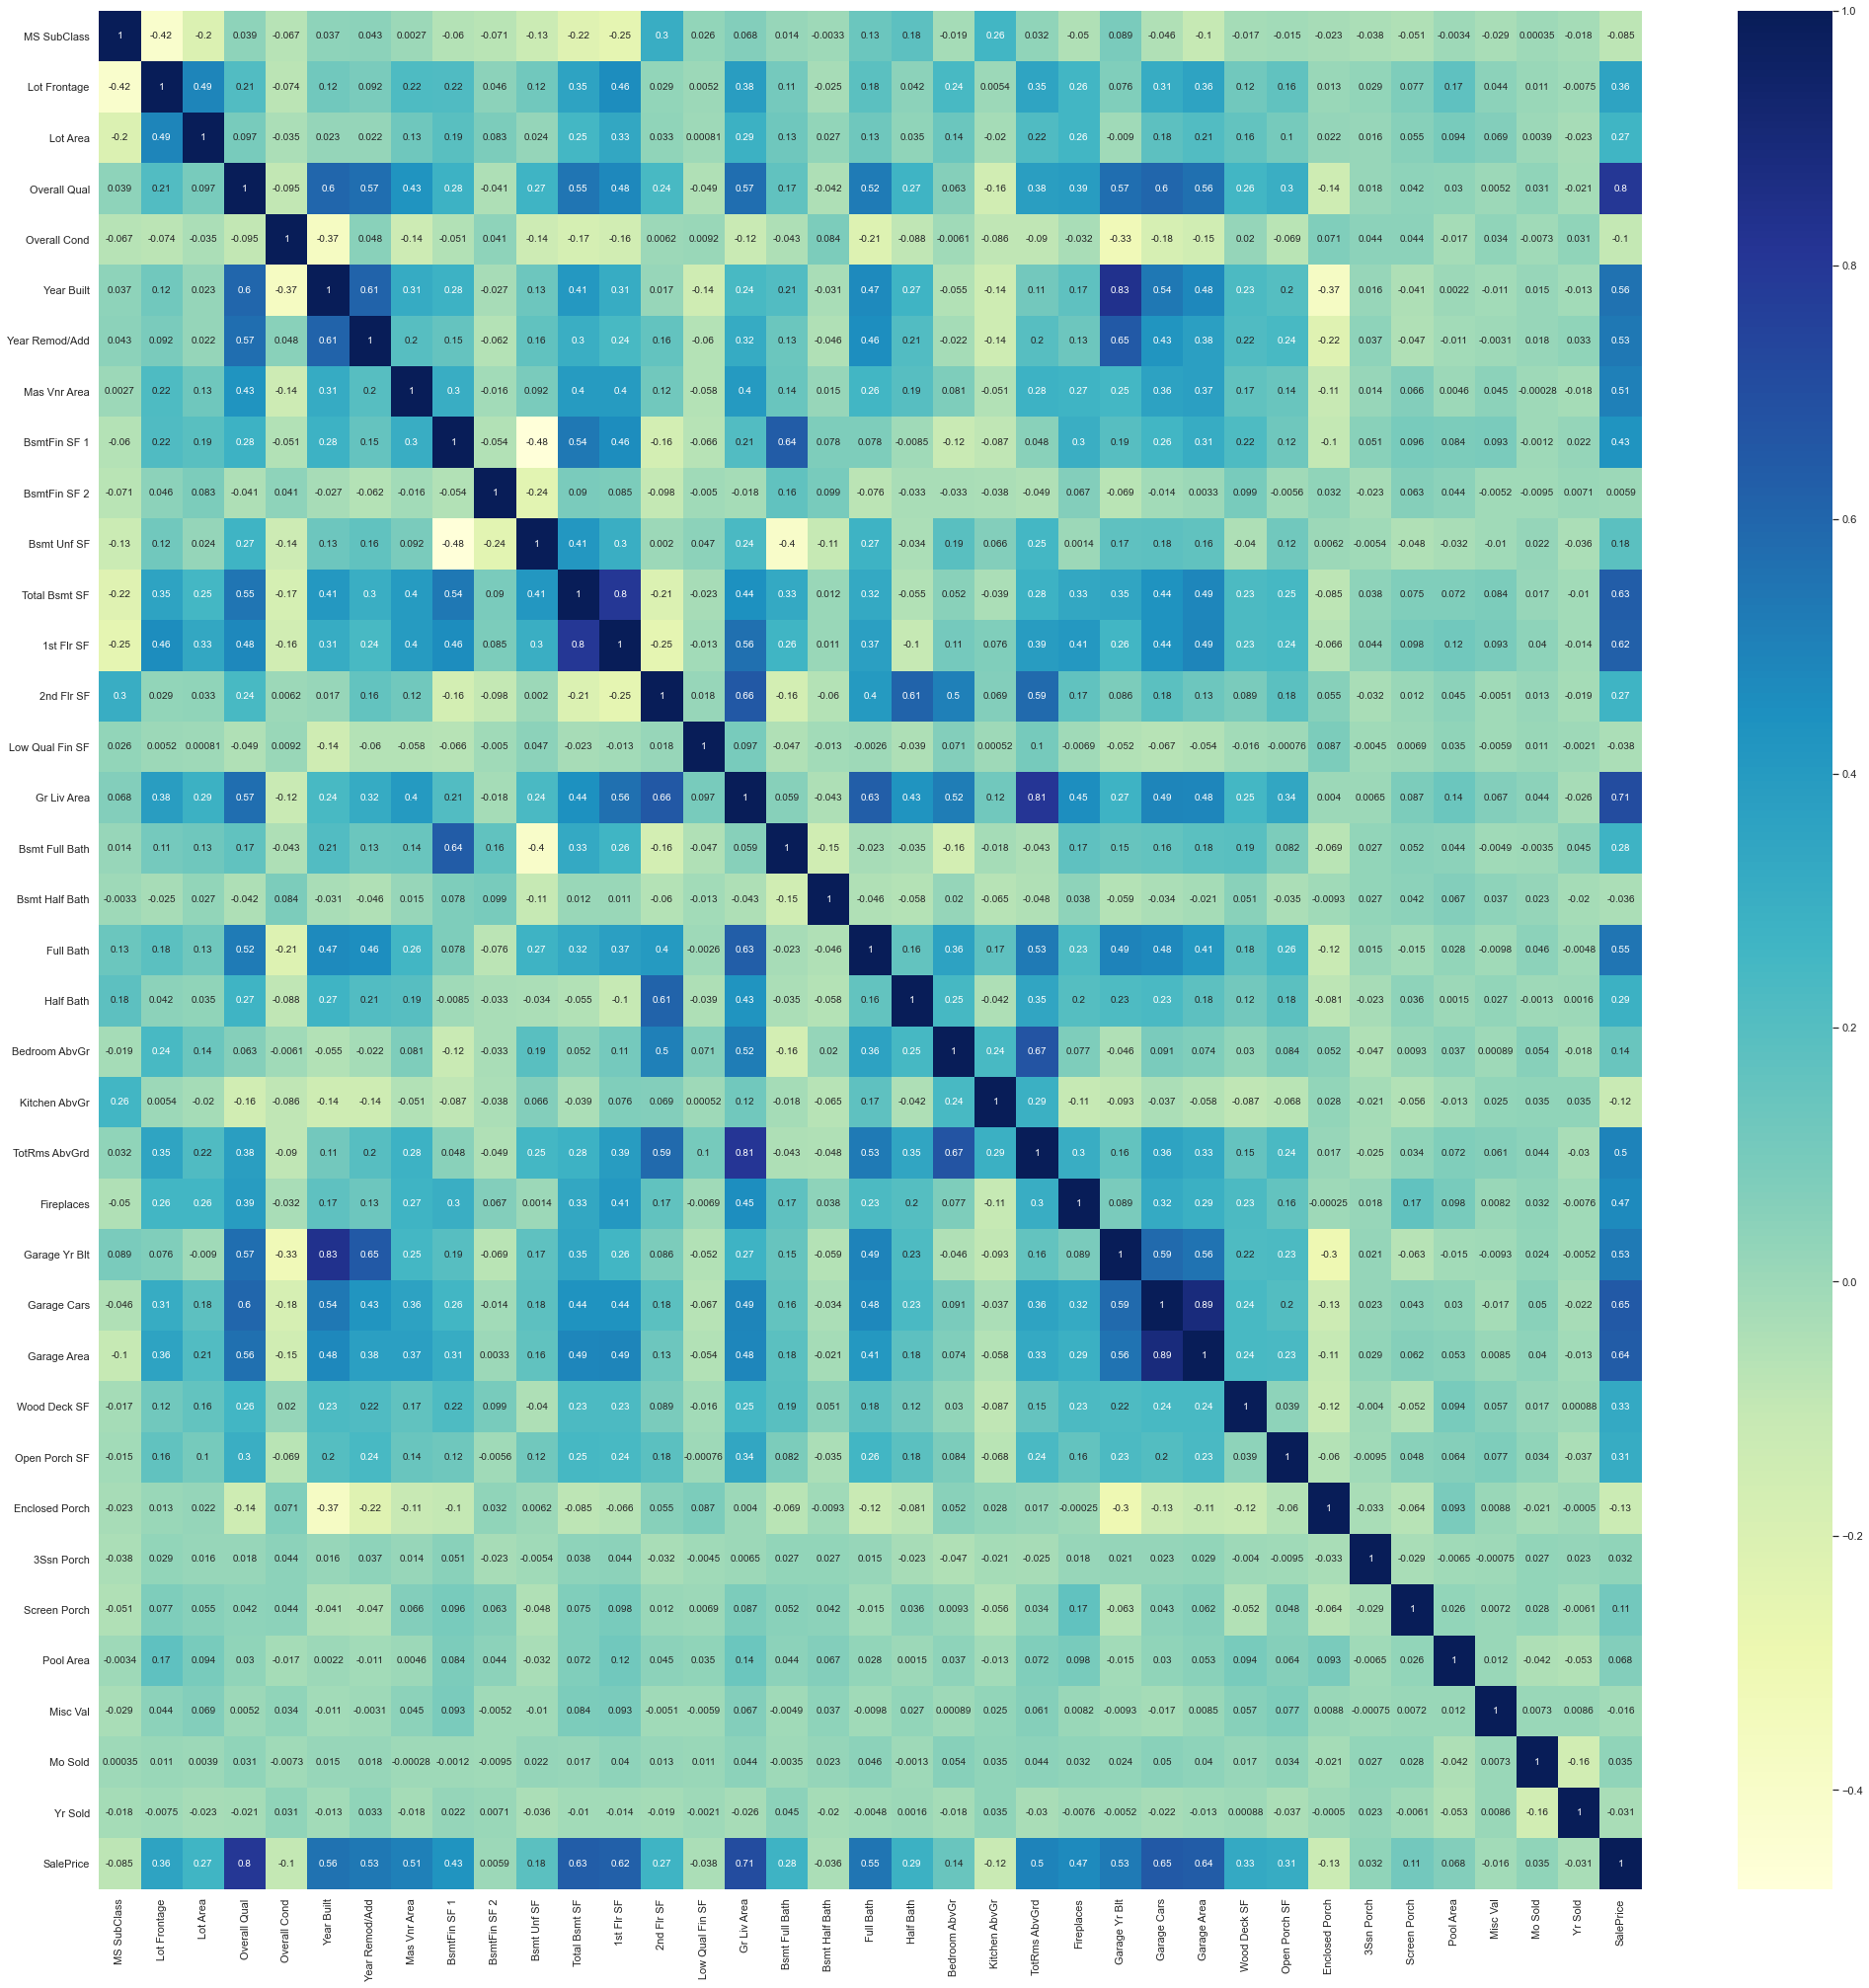

In [10]:
plt.figure(figsize = (35,35))
correlation_plot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

# Separate Independent/Dependent Variables in the Train Set

In [11]:
data_labels = data["SalePrice"]
data = data.drop("SalePrice", axis=1)

# Split the Data into Train/Test Splits

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.2)

# Split Train Dataset based on Variable Types (Character vs Numeric)

In [13]:
data_char = x_train.loc[:,x_train.dtypes==object]
data_num = x_train.loc[:,x_train.dtypes!=object]

# Show Character Variables

In [14]:
data_char.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
1528,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Stucco,Stucco,None,Gd,Gd,PConc,Fa,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,P,NaN,GdPrv,NaN,WD,Normal
23,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,Shed,WD,Normal
1741,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,Gable,CompShg,WdShing,Wd Shng,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
2808,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial
560,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,GdWo,Shed,WD,Normal


# Show Numeric Variables

In [15]:
data_num.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1528,70,54.0,7609,8,9,1925,1997,0.0,406.0,0.0,392.0,798.0,798,714,0,1512,1.0,0.0,2,0,3,1,7,1,1925.0,1.0,180.0,85,16,41,0,0,0,0,6,2008
23,20,NaN,11241,6,7,1970,1970,180.0,578.0,0.0,426.0,1004.0,1004,0,0,1004,1.0,0.0,1,0,2,1,5,1,1970.0,2.0,480.0,0,0,0,0,0,0,700,3,2010
1741,120,53.0,3922,7,5,2006,2007,72.0,0.0,0.0,1258.0,1258.0,1258,0,0,1258,0.0,0.0,2,0,2,1,6,1,2007.0,3.0,648.0,144,16,0,0,0,0,0,6,2007
2808,60,74.0,8581,7,5,2006,2006,0.0,0.0,0.0,851.0,851.0,851,886,0,1737,0.0,0.0,2,1,3,1,7,0,2006.0,2.0,578.0,0,105,0,0,0,0,0,8,2006
560,20,80.0,10000,5,6,1961,1983,0.0,594.0,0.0,270.0,864.0,1144,0,0,1144,1.0,0.0,1,0,3,1,6,1,1961.0,1.0,264.0,165,0,0,0,0,0,400,3,2009


# Data Manipulation Pipeline (Handling Missing Values, Feature Selection, Encoding for Categorical Variables, Feature Scaling for Numeric Variables)

In [16]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_vars = list(data_num)    
char_vars = list(data_char)  
        
    
numerical_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_vars)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)), 
    ('feature_scaler', MaxAbsScaler()),
    ('log_transformer', PowerTransformer()),
    ('feature_selection', PCA(n_components=0.95))
])        

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(char_vars)),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
    ('feature_selection', TruncatedSVD(n_components=20))
]) 

full_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline)    
])

prepared_data = full_pipeline.fit_transform(x_train)
prepared_data_test = full_pipeline.fit_transform(x_test)

In [17]:
prepared_data.shape

(2344, 45)

In [18]:
prepared_data_test.shape

(586, 45)

# Train and Evaluate ML Model

### Linear Regression and Gradient Boosted Tree Models will be used to predict house prices

In [19]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

### Train the Linear Regressor Model on the Train Dataset

In [20]:
Linear_model = LinearRegression()
Linear_model.fit(prepared_data, y_train)
housing_predictions_linear = Linear_model.predict(prepared_data)
r2 = r2_score(y_train, housing_predictions_linear)
mse = mean_squared_error(y_train, housing_predictions_linear)
rmse = np.sqrt(mse)
print("Linear regression Model R-Squared is", round(r2,2))
print("Linear regression Model MSE is", round(rmse,2))

Linear regression Model R-Squared is 0.86
Linear regression Model MSE is 30590.17


### Train the Gradient Boosted Model on the Train Dataset

In [41]:
Tree_model = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=800)
Tree_model.fit(prepared_data, y_train)
housing_predictions_tree = Tree_model.predict(prepared_data)
r2 = r2_score(y_train, housing_predictions_tree)
mse = mean_squared_error(y_train, housing_predictions_tree)
rmse = np.sqrt(mse)
print("Gradient Boosted Tree Model R-Squared is", round(r2,2))
print("Gradient Boosted Tree Model MSE is", round(rmse,2))

Gradient Boosted Tree Model R-Squared is 0.99
Gradient Boosted Tree Model MSE is 6033.18


### Evaluate the Linear Regression Model on the Test Dataset Using R-Squared Metric

In [42]:
housing_prediction_test_linear = Linear_model.predict(prepared_data_test)
r2 = r2_score(y_test, housing_prediction_test_linear)
mse = mean_squared_error(y_test, housing_prediction_test_linear)
rmse = np.sqrt(mse)
print("Linear regression Model R-Squared is", round(r2,2))
print("Linear regression Model MSE is", round(rmse,2))

Linear regression Model R-Squared is 0.63
Linear regression Model MSE is 46423.32


### Evaluate the Gradient Boosted Model on the Test Dataset Using R-Squared Metric

In [43]:
housing_prediction_test_tree = Tree_model.predict(prepared_data_test)
r2 = r2_score(y_test, housing_prediction_test_tree)
mse = mean_squared_error(y_test, housing_prediction_test_tree)
rmse = np.sqrt(mse)
print("Gradient Boosted Tree Model R-Squared is", round(r2,2))
print("Gradient Boosted Tree Model MSE is", round(rmse,2))

Gradient Boosted Tree Model R-Squared is 0.8
Gradient Boosted Tree Model MSE is 33870.6


Note the MSE is quite high due to a number of reasons. To name a few:
1. The small size of the dataset
2. The models not being optimimally tuned. This can be remedied using hyperparameter tuning methods like grid search, bayesian search, etc

# Generate House Price Estimates Using the Final ML Model

### Create Sample Data for a Random House

In [44]:
house = pd.read_csv(r'/Users/emilmaynard/Documents/Ames House Price Prediction/AmesHousing_Random.csv')
house = house.drop(columns = ['Order'])
house

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [45]:
house_labels = house['SalePrice']
house = house.drop('SalePrice', axis=1)

### Select Some Parameters for Our House and See What Valuation the Model Gives It

In [46]:
house["Year.Built"] = 1973
house["House.Style"] = '2Story'
house["Bedroom.AbvGr"] = 3
house["Full.Bath"] = 2
house["TotRms.AbvGrd"] = 7
house["Overall.Qual"] = 6
house["Gr.Liv.Area"] = 1050
house["Garage.Cars"] = 2

In [47]:
prepared_sample = full_pipeline.transform(house)
house_estimate = Tree_model.predict(prepared_sample)

In [48]:
print("The Estimated sale price of our house is", round(house_estimate[0]), "dollars")

The Estimated sale price of our house is 188180 dollars


# Grid Search

In [49]:
'''''''''
from sklearn.model_selection import GridSearchCV
parameter_grid = [
    {
        'n_estimators': [100, 400, 800],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.05, 0.1, 0.20],
        'min_child_weight': [1, 10, 100]
    }
]

model = XGBRegressor()
grid_search = GridSearchCV(model, parameter_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(prepared_data, y_train)
'''''


"\nfrom sklearn.model_selection import GridSearchCV\nparameter_grid = [\n    {\n        'n_estimators': [100, 400, 800],\n        'max_depth': [3, 6, 9],\n        'learning_rate': [0.05, 0.1, 0.20],\n        'min_child_weight': [1, 10, 100]\n    }\n]\n\nmodel = XGBRegressor()\ngrid_search = GridSearchCV(model, parameter_grid, cv=5, scoring='neg_mean_squared_error')\ngrid_search.fit(prepared_data, y_train)\n"

In [50]:
#grid_search.best_params_